<a href="https://colab.research.google.com/github/regret789/AI-Project/blob/main/An_AutoML_Enabled_Framework_for_Early_Detection_of_Myocardial_Infarction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: An AutoML-Enabled Framework for Early Detection of Myocardial Infarction


### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis
- Feature Engineering
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd      # Importing pandas library for data manipulation and analysis
import numpy as np       # Importing NumPy for numerical operations
import seaborn as sns    # Importing Seaborn for advanced data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting





Let us import our Data Set


In [6]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart.csv


In [9]:
df= pd.read_csv("heart.csv") # Since  uploaded heart.csv, it's stored in /content/

In [10]:
# Dropping less relevant features for this model:
# 'oldpeak' -> ST depression induced by exercise relative to rest (numeric value)
# 'slp'     -> Slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)
# 'thall'   -> Thalassemia blood disorder indicator (3 = normal, 6 = fixed defect, 7 = reversible defect)
# These features are sometimes removed during feature selection depending on the AutoML pipeline.
df = df.drop(['oldpeak', 'slp', 'thall'], axis=1)


In [11]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

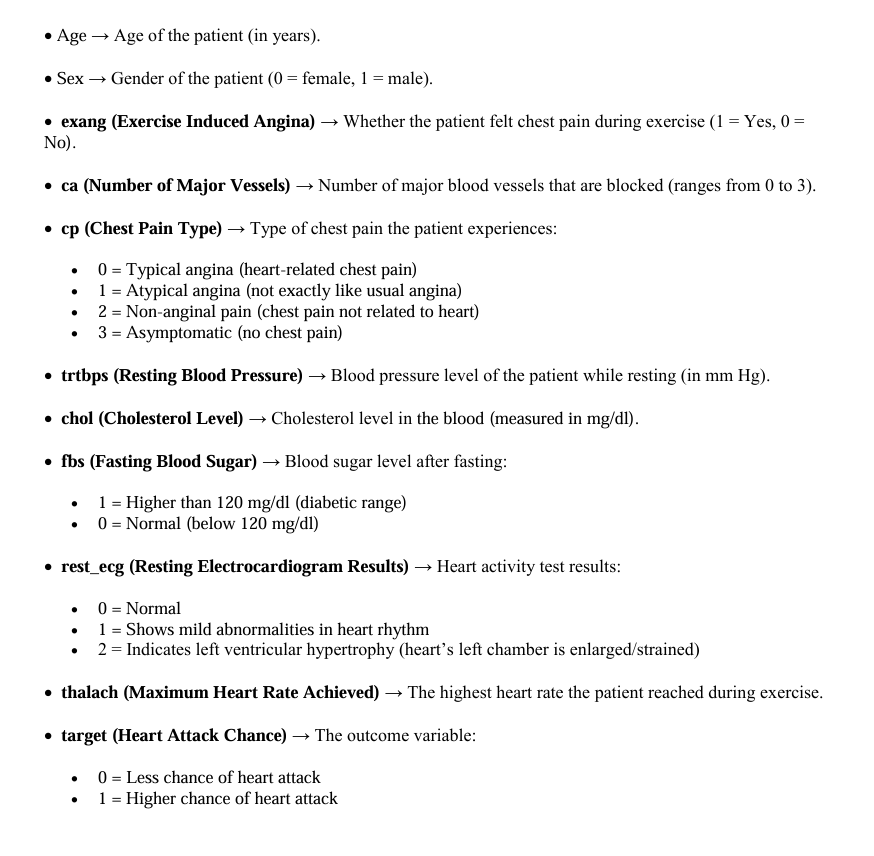


In [15]:
# Checking the shape of the dataset
# (returns a tuple: number of rows, number of columns)
df.shape


(303, 11)

In [16]:
# Checking for missing (null) values in each column of the dataset
# It shows how many null values are present per column
df.isnull().sum()


,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
caa,0


#### As we can see there are no null values in our Data Set

In [14]:
# Calculating the correlation matrix of the dataset
# It shows how strongly each pair of features are related to each other
# Values range from -1 (perfect negative relation) to +1 (perfect positive relation)
df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

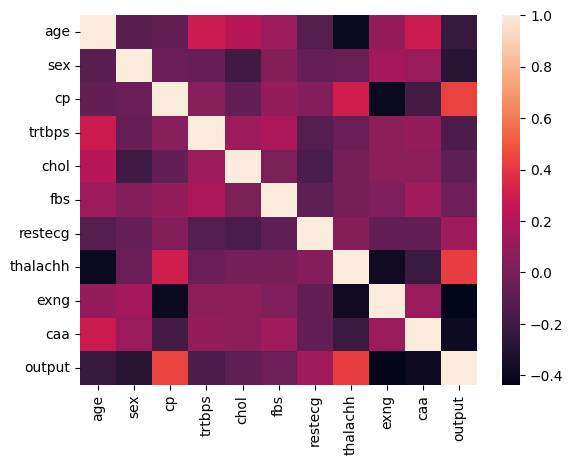

In [17]:
sns.heatmap(df.corr())  # Creates a heatmap (color-coded table) of the correlation values to easily visualize relationships between features


#### As we can see our variables are not highly correlated to each other

#### We will do Uni and Bi variate analysis on our Features

Text(0, 0.5, 'Count')

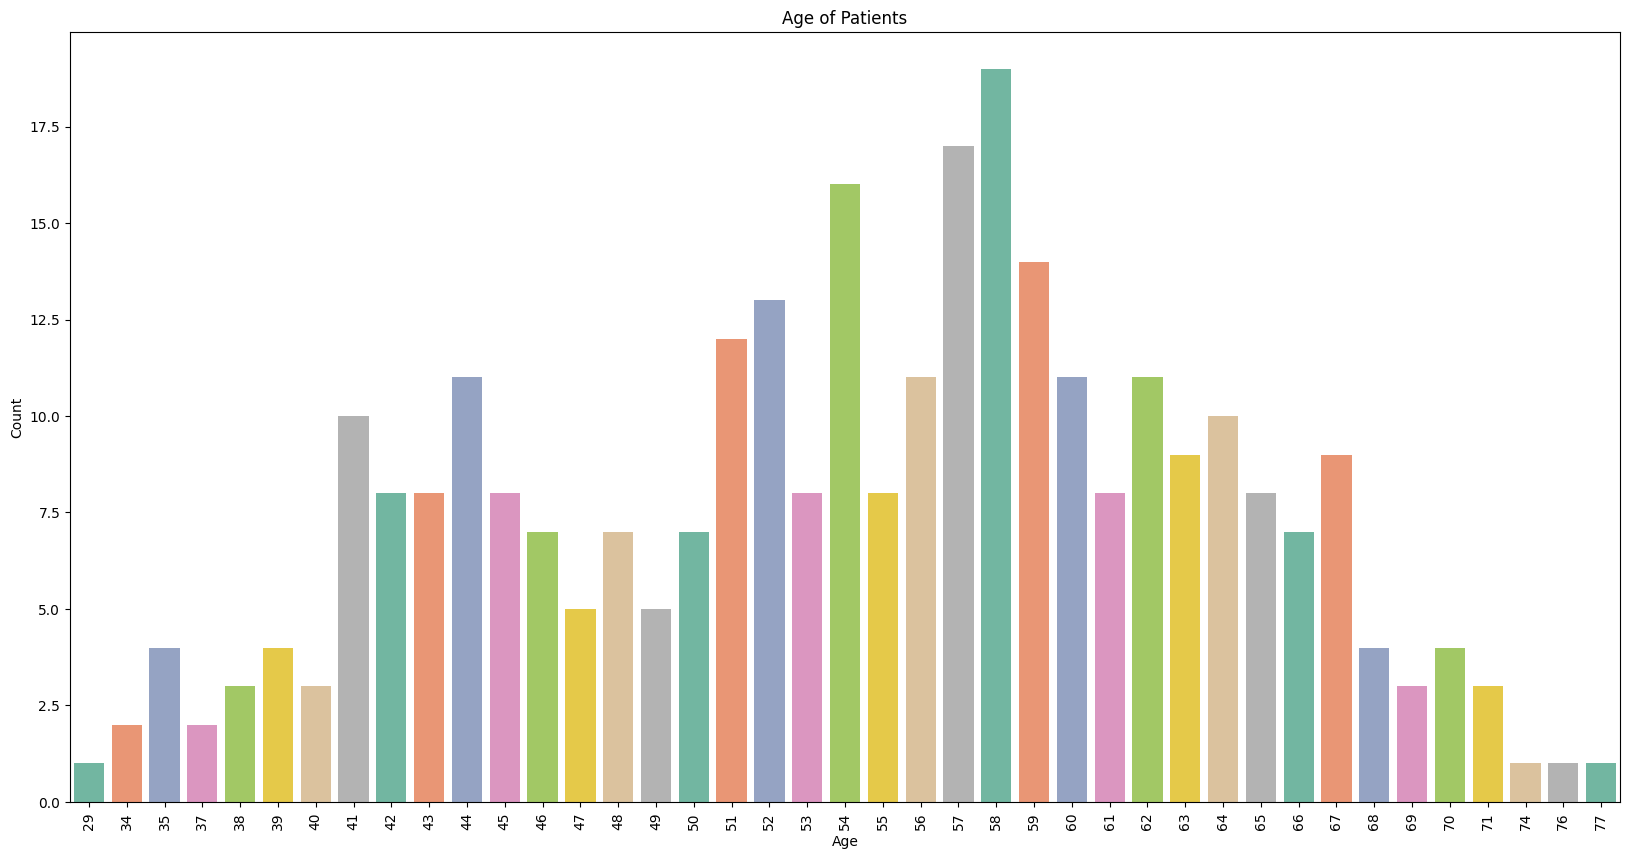

In [28]:
plt.figure(figsize=(20, 10))   # Set the figure size (width=20, height=10) for better readability

plt.title("Age of Patients")   # Add a title to the chart
plt.xlabel("Age")              # Label the x-axis as "Age"

# Countplot showing how many patients fall into each age group
# Using 'hue="age"' + 'legend=False' to avoid FutureWarning
sns.countplot(x='age', data=df, hue="age", palette="Set2", legend=False)

plt.xticks(rotation=90)   # Rotate x-axis labels for better visibility if many age values
plt.ylabel("Count")       # Label y-axis



#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients, 0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

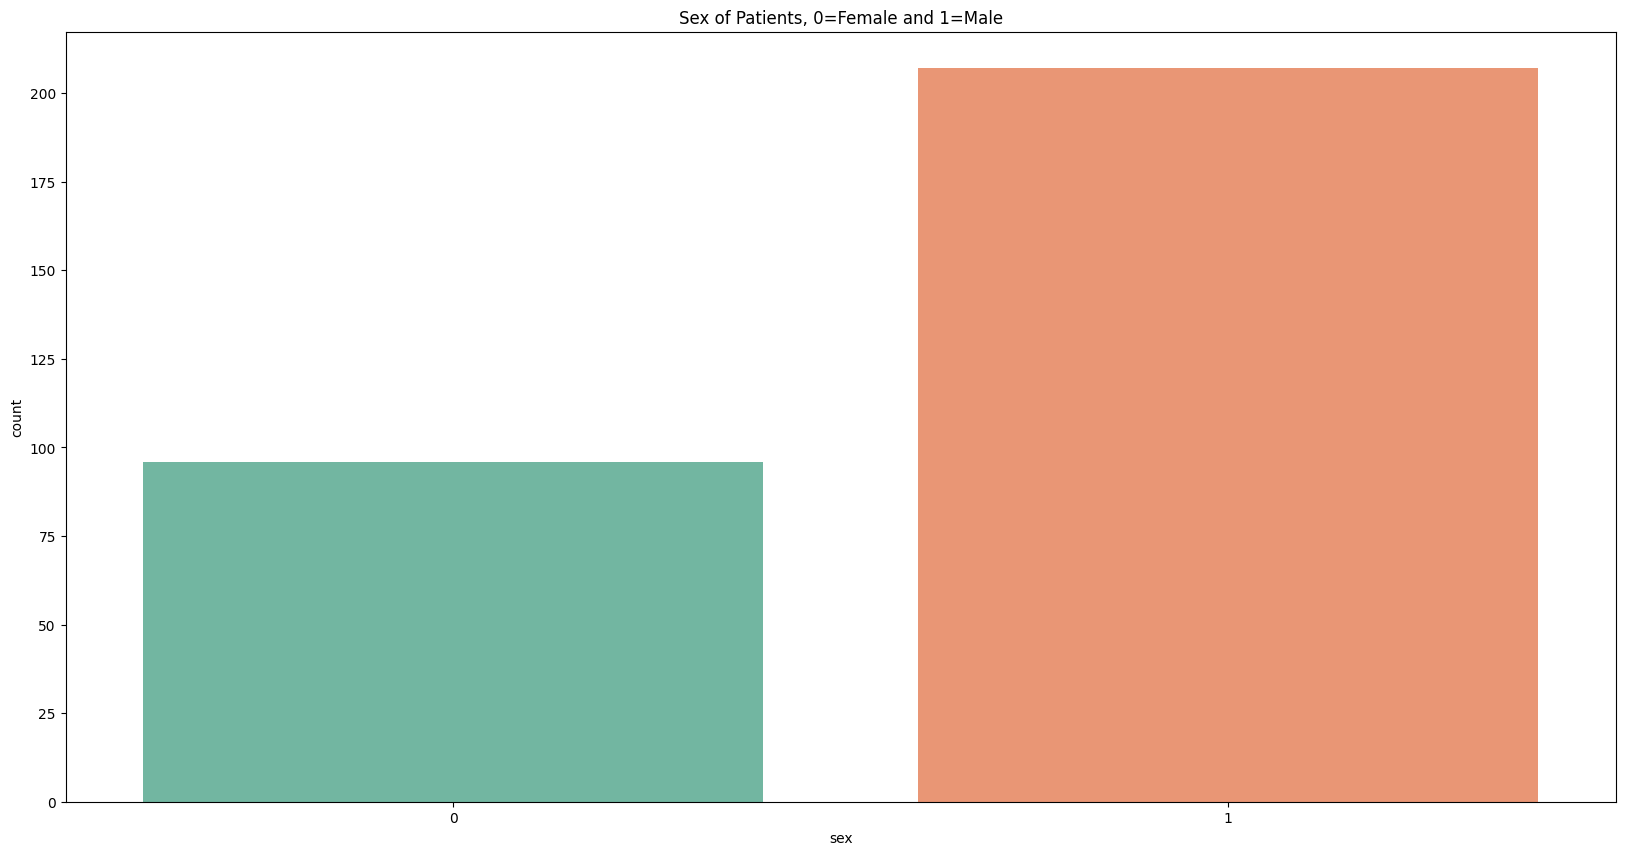

In [27]:
plt.figure(figsize=(20, 10))   # Set the figure size (wide for clear visualization)

plt.title("Sex of Patients, 0=Female and 1=Male")   # Add a descriptive title

# Plot a countplot showing the number of male (1) and female (0) patients
# Using 'hue="sex"' with 'legend=False' to avoid FutureWarning
sns.countplot(x='sex', data=df, hue="sex", palette="Set2", legend=False)



In [21]:
# Count the values of 'cp' (chest pain type) and reset the index
cp_data = df['cp'].value_counts().reset_index()

# Rename columns for clarity
cp_data.columns = ['cp', 'count']

# Replace numerical cp values with descriptive labels
cp_data['cp'] = cp_data['cp'].replace({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal',
    3: 'Asymptomatic'
})

cp_data


,cp,count
0,Typical Angina,143
1,Non-anginal,87
2,Atypical Angina,50
3,Asymptomatic,23


<Axes: title={'center': 'Chest Pain of Patients'}, xlabel='cp', ylabel='count'>

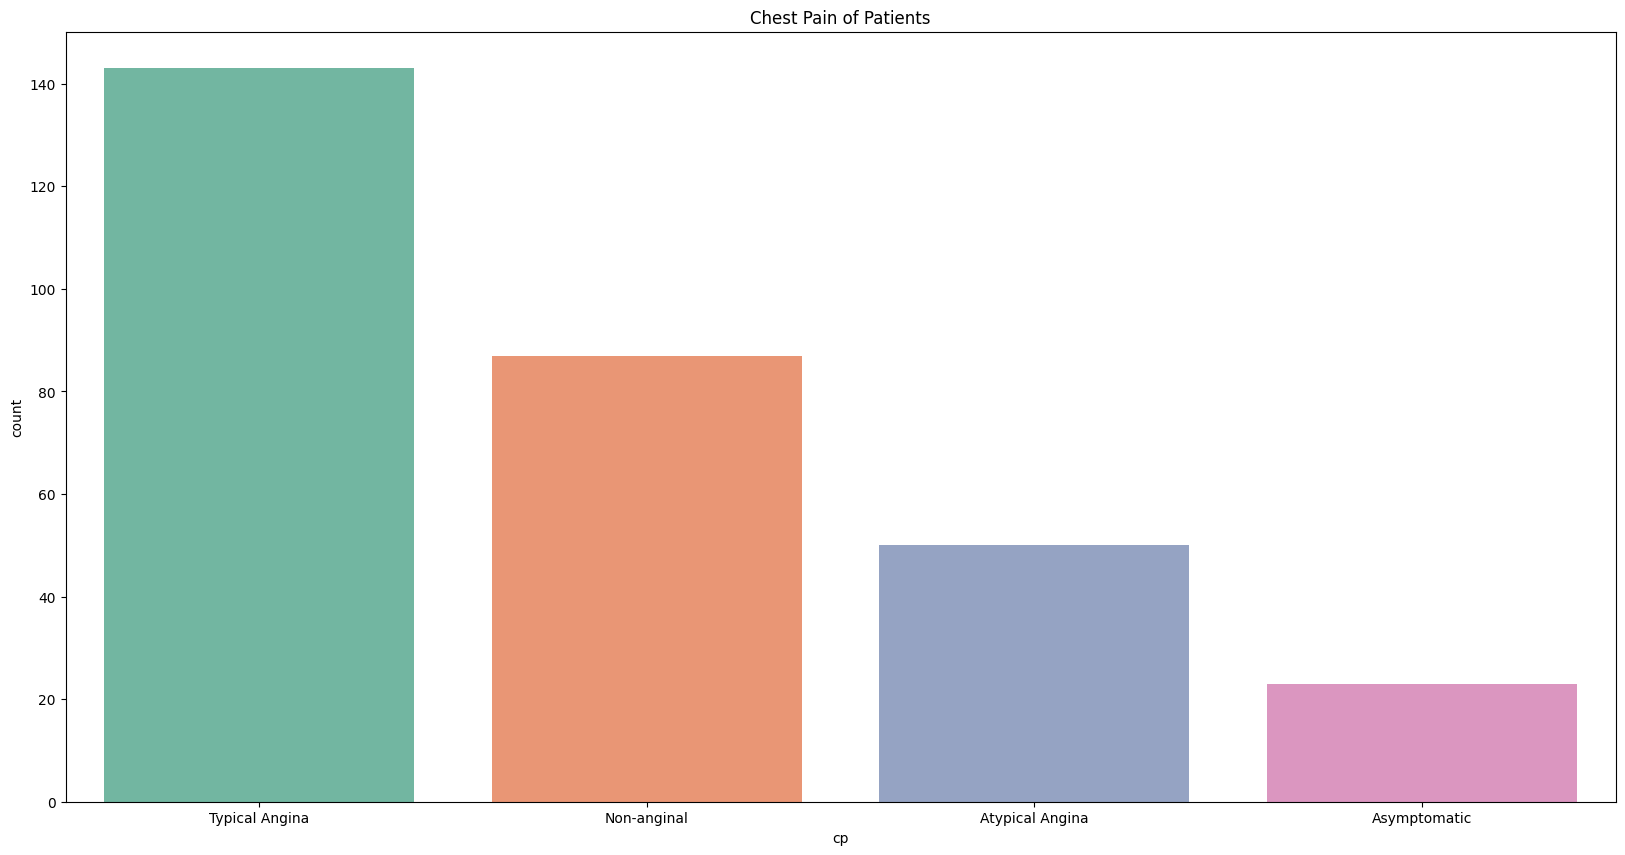

In [26]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Set the title of the chart
plt.title("Chest Pain of Patients")

# Create a barplot with different colors for each chest pain type
# Use 'hue' to apply different colors and disable legend since it's redundant
sns.barplot(x="cp", y="count", data=cp_data, hue="cp", palette="Set2", legend=False)




#### We have seen how the the Chest Pain Category is distributed

In [29]:
# Get value counts of 'restecg' and reset index into a DataFrame
ecg_data = df['restecg'].value_counts().reset_index()

# Rename the columns for clarity
ecg_data.columns = ['restecg', 'count']

# Replace numeric values with meaningful labels
ecg_data.loc[ecg_data['restecg'] == 0, 'restecg'] = 'normal'
ecg_data.loc[ecg_data['restecg'] == 1, 'restecg'] = 'having ST-T wave abnormality'
ecg_data.loc[ecg_data['restecg'] == 2, 'restecg'] = 'showing probable or definite left ventricular hypertrophy by Estes'

# Display final DataFrame
ecg_data


/tmp/ipython-input-937468430.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ecg_data.loc[ecg_data['restecg'] == 0, 'restecg'] = 'normal'


,restecg,count
0,having ST-T wave abnormality,152
1,normal,147
2,showing probable or definite left ventricular ...,4


/tmp/ipython-input-3765184860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ecg_data['restecg'], y=ecg_data['count'], palette="Set2")


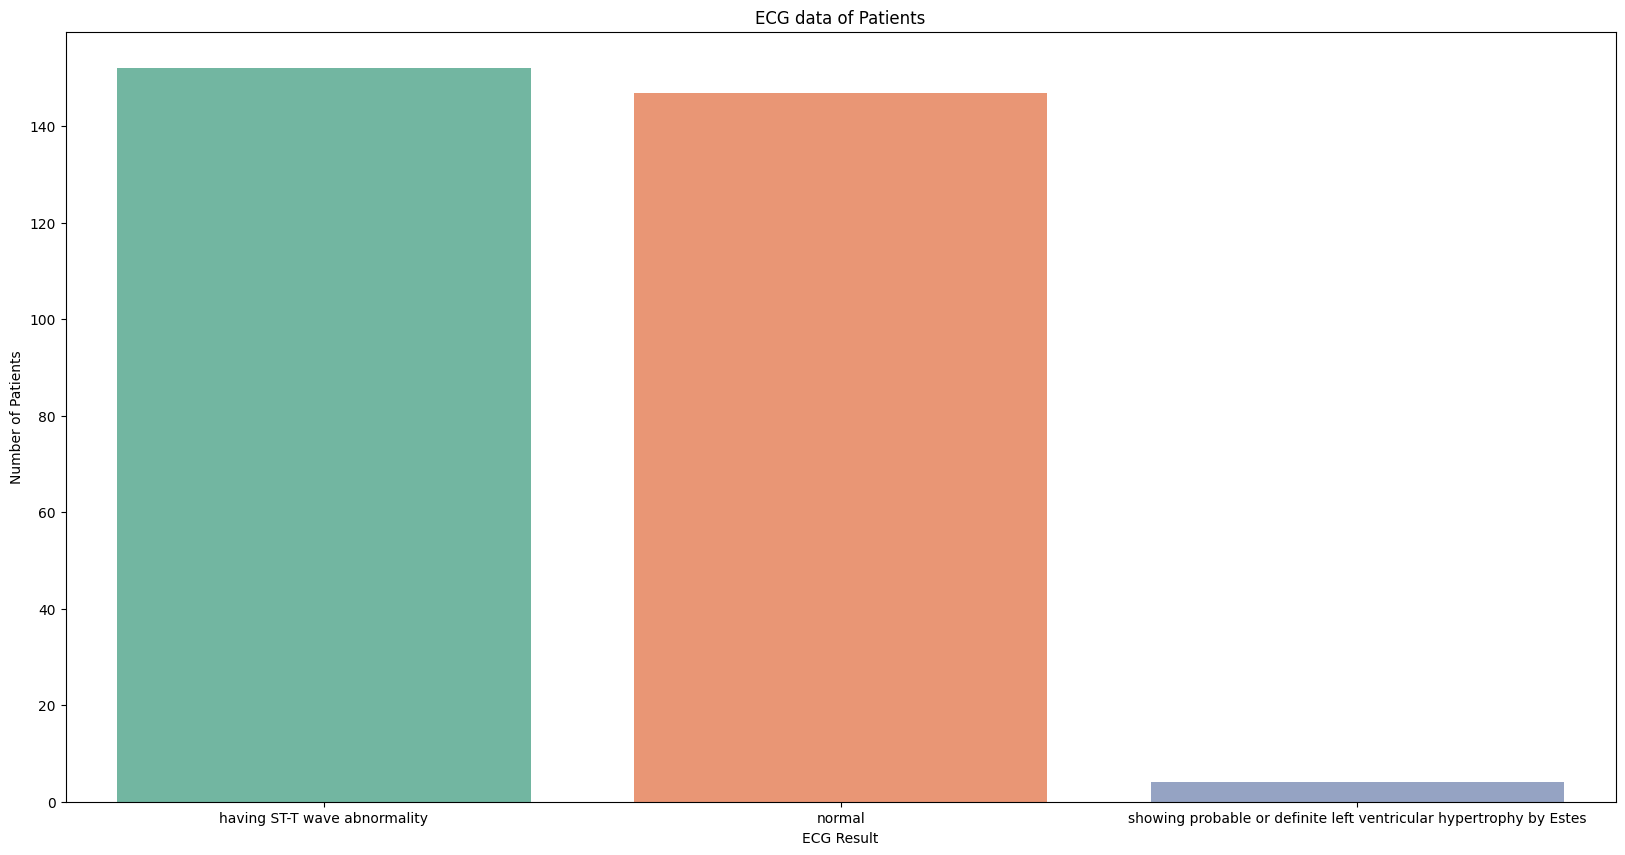

In [31]:
plt.figure(figsize=(20, 10))   # Set figure size for readability
plt.title("ECG data of Patients")   # Add title

# Plot bar chart with categories on x-axis and their counts on y-axis
sns.barplot(x=ecg_data['restecg'], y=ecg_data['count'], palette="Set2")

plt.xlabel("ECG Result")       # Label for x-axis
plt.ylabel("Number of Patients")  # Label for y-axis
plt.show()


#### This is our ECG Data

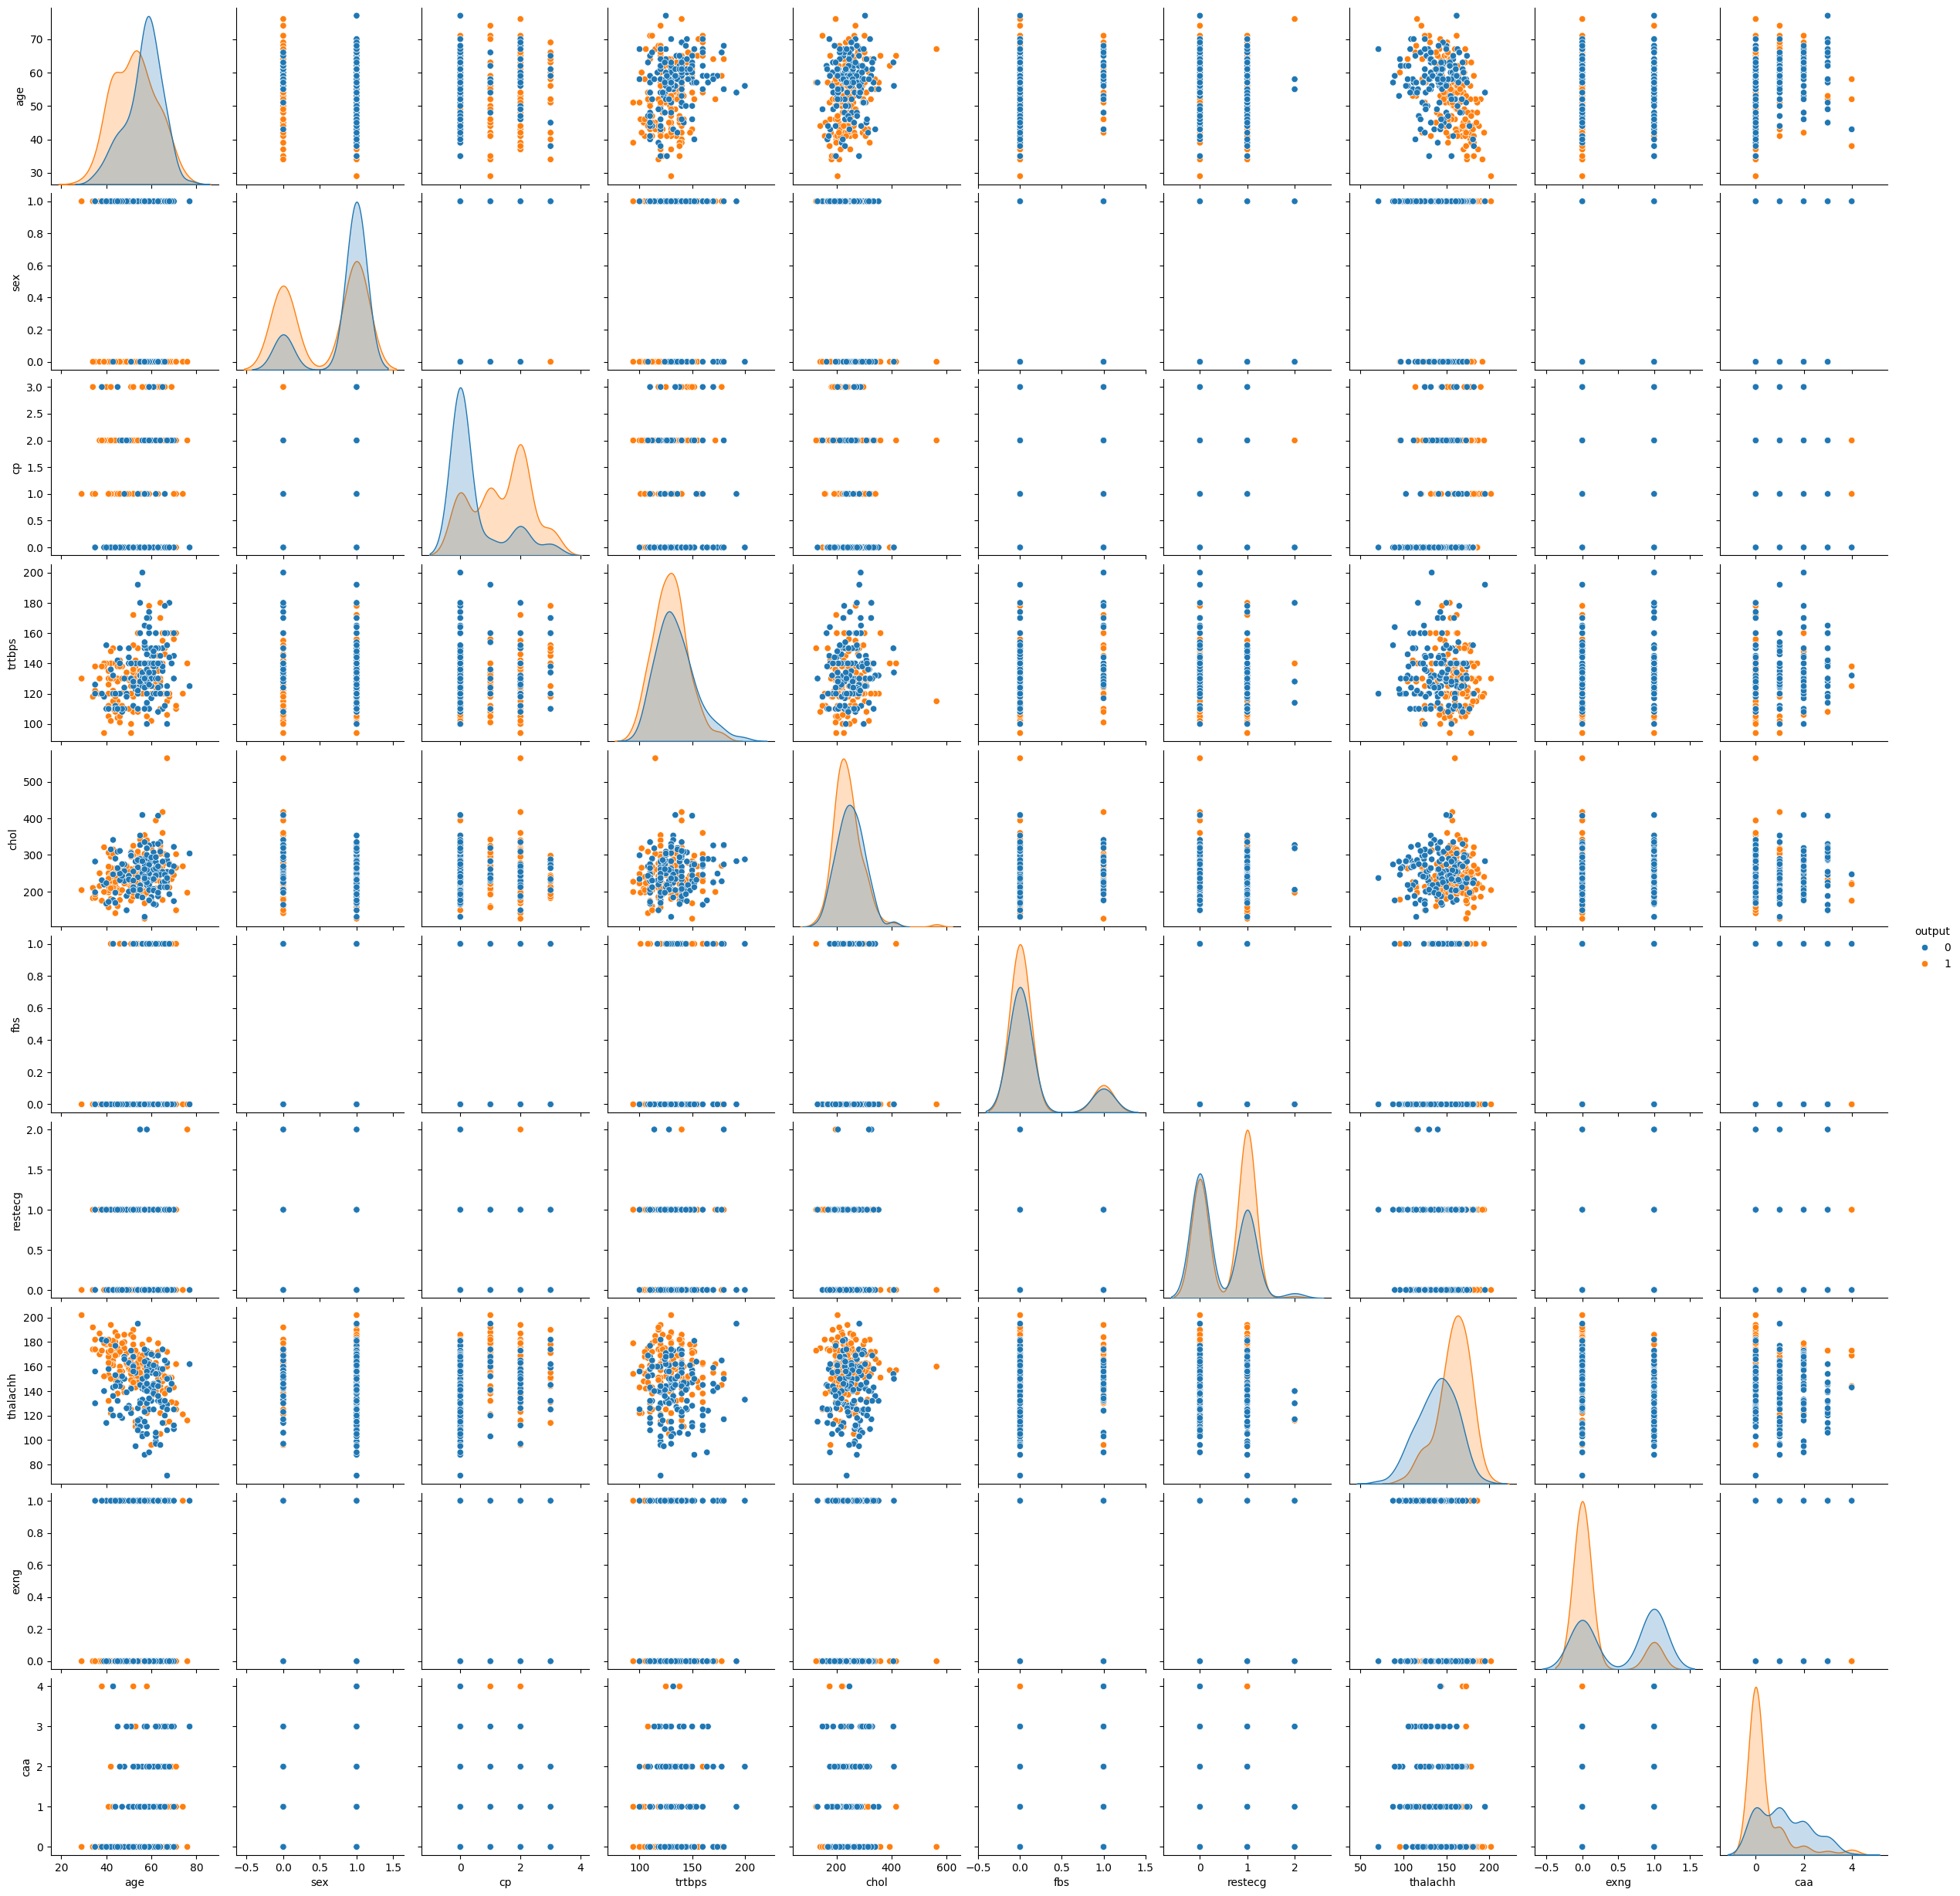

In [34]:
# Pairplot with hue based on the 'output' column
sns.pairplot(df, hue='output')
plt.show()


### Let us see for our Continuous Variable

/tmp/ipython-input-1577670658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color='magenta')   # Plot histogram + KDE for resting blood pressure
/tmp/ipython-input-1577670658.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, color='teal'

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

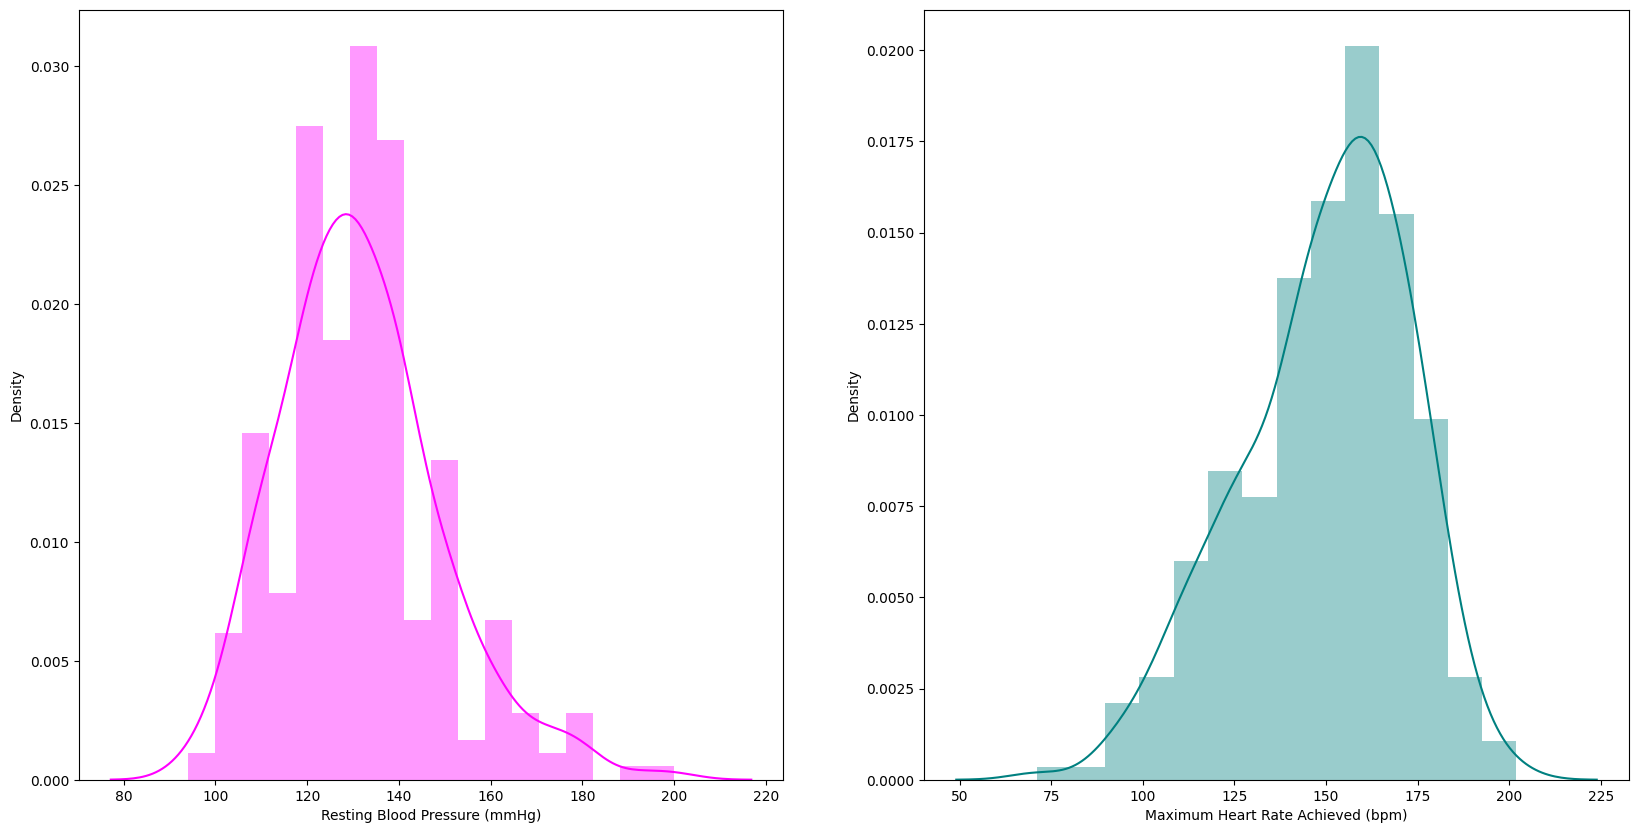

In [36]:
plt.figure(figsize=(20,10))   # Set the figure size (width=20, height=10)

# ---- Subplot 1: Distribution of Resting Blood Pressure ----
plt.subplot(1,2,1)   # First subplot (1 row, 2 columns, position 1)
sns.distplot(df['trtbps'], kde=True, color='magenta')   # Plot histogram + KDE for resting blood pressure
plt.xlabel("Resting Blood Pressure (mmHg)")   # Label the x-axis

# ---- Subplot 2: Distribution of Maximum Heart Rate ----
plt.subplot(1,2,2)   # Second subplot (1 row, 2 columns, position 2)
sns.distplot(df['thalachh'], kde=True, color='teal')   # Plot histogram + KDE for maximum heart rate
plt.xlabel("Maximum Heart Rate Achieved (bpm)")   # Label the x-axis


/tmp/ipython-input-2708001387.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color='red')   # Plot histogram + KDE for cholesterol values


Text(0.5, 1.0, "Distribution of Patients' Cholesterol Levels")

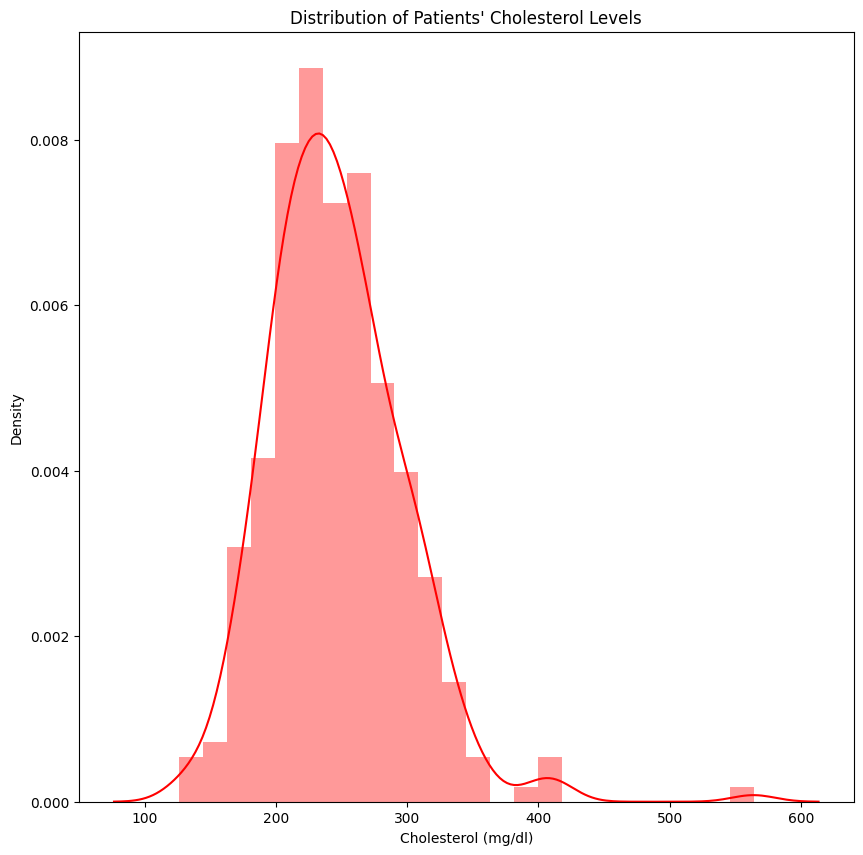

In [37]:
plt.figure(figsize=(10,10))   # Set the figure size (square for better visualization)

# ---- Distribution of Cholesterol ----
sns.distplot(df['chol'], kde=True, color='red')   # Plot histogram + KDE for cholesterol values
plt.xlabel("Cholesterol (mg/dl)")   # Label the x-axis
plt.title("Distribution of Patients' Cholesterol Levels")   # Add a title to the chart


#### We have done the Analysis of the data now let's have a look at out data

In [38]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let us do Standardisation

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scale = StandardScaler()   # Create a StandardScaler object to standardize features (mean=0, std=1)


In [58]:
scale.fit(df)   # Compute the mean and standard deviation for each feature in the DataFrame 'df'


StandardScaler()

In [59]:
df = scale.transform(df)   # Apply the previously learned scaling to the DataFrame 'df', transforming all features to have mean=0 and std=1


In [60]:
df = pd.DataFrame(df, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
                               'exng', 'caa', 'output'])
# Convert the scaled NumPy array back into a pandas DataFrame
# and assign meaningful column names to preserve the original feature names


In [44]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [48]:
x = df.iloc[:, :-1]   # Select all rows and all columns except the last one


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [62]:
y = df.iloc[:, -1:]   # Select all rows, but only the last column (kept as DataFrame)


In [64]:
print(y)

       output
0    0.914529
1    0.914529
2    0.914529
3    0.914529
4    0.914529
..        ...
298 -1.093459
299 -1.093459
300 -1.093459
301 -1.093459
302 -1.093459

[303 rows x 1 columns]


In [65]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y,                 # Features (x) and target (y)
    test_size=0.3,        # 30% data for testing, 70% for training
    random_state=101      # Random seed to make the split reproducible
)


### Logistic Regression

In [146]:
# Import necessary libraries for modeling and evaluation
import pandas as pd
from sklearn.model_selection import train_test_split # To split dataset
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import confusion_matrix, accuracy_score  # For evaluation



In [147]:
# Load the dataset
df = pd.read_csv("heart.csv")  # Replace with your file path if needed

# Quick look at the data
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [148]:

# Select features (all columns except 'output') and target ('output')
X = df.iloc[:, :-1]              # Features (independent variables)
y = df['output'].astype(int)     # Target (dependent variable), converted to integer



In [149]:
# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)




In [150]:
# Create and train the Logistic Regression model
logreg = LogisticRegression()    # Initialize model
logreg.fit(x_train, y_train)     # Train on training data




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
# Predict labels for the test set
Y_pred1 = logreg.predict(x_test)

# Display all predictions
print(Y_pred1)   # Shows predictions for all test samples



[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]


In [152]:
# Flatten y_test (if needed) and ensure integer type
y_test_series = y_test.values.ravel().astype(int)

# Compute confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test_series, Y_pred1)
lr_acc_score = accuracy_score(y_test_series, Y_pred1)

# Display results
print("Confusion Matrix:\n", lr_conf_matrix)




Confusion Matrix:
 [[35  9]
 [ 2 45]]
Accuracy Score: 87.91208791208791 %


In [153]:
print("Accuracy Score:", lr_acc_score * 100, "%")   # Print the accuracy of the Logistic Regression model as a percentage


Accuracy Score: 87.91208791208791 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree = DecisionTreeClassifier()   # Create a Decision Tree classifier object for predicting heart attack


In [79]:
tree.fit(x_train, encoded_y)   # Train the Decision Tree model using the training features (x_train) and encoded target labels (encoded_y)


DecisionTreeClassifier()

In [80]:
ypred2 = tree.predict(x_test)   # Use the trained Decision Tree model to predict target labels for the test set


In [81]:
encoded_ytest = lbl.fit_transform(y_test)   # Encode the test target labels into numeric form using LabelEncoder


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
# Compute the confusion matrix for the Decision Tree predictions
tree_conf_matrix = confusion_matrix(encoded_ytest, ypred2)

# Compute the accuracy score for the Decision Tree predictions
tree_acc_score = accuracy_score(encoded_ytest, ypred2)


In [83]:
tree_conf_matrix   # Display the confusion matrix of the Decision Tree model
# Shows the counts of correct and incorrect predictions:
# - [0,0] → True Negatives (correctly predicted no heart attack)
# - [0,1] → False Positives (predicted heart attack, but actually no)
# - [1,0] → False Negatives (predicted no heart attack, but actually yes)
# - [1,1] → True Positives (correctly predicted heart attack)


array([[26, 18],
       [ 9, 38]])

In [84]:
print(tree_acc_score * 100, "%")   # Print the accuracy of the Decision Tree model as a percentage


70.32967032967034 %


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()   # Create a Random Forest classifier object for predicting heart attack


In [87]:
rf.fit(x_train, encoded_y)   # Train the Random Forest model using the training features (x_train) and encoded target labels (encoded_y)


RandomForestClassifier()

In [88]:
ypred3 = rf.predict(x_test)   # Use the trained Random Forest model to predict target labels for the test set


In [89]:
# Compute the confusion matrix for the Random Forest predictions
rf_conf_matrix = confusion_matrix(encoded_ytest, ypred3)

# Compute the accuracy score for the Random Forest predictions
rf_acc_score = accuracy_score(encoded_ytest, ypred3)


In [90]:
rf_conf_matrix   # Display the confusion matrix of the Random Forest model
# Shows the counts of correct and incorrect predictions:
# - [0,0] → True Negatives (correctly predicted no heart attack)
# - [0,1] → False Positives (predicted heart attack, but actually no)
# - [1,0] → False Negatives (predicted no heart attack, but actually yes)
# - [1,1] → True Positives (correctly predicted heart attack)


array([[33, 11],
       [ 6, 41]])

In [91]:
print(rf_acc_score * 100, "%")   # Print the accuracy of the Random Forest model as a percentage


81.31868131868131 %


#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



In [201]:
# Load dataset
df = pd.read_csv("heart.csv")  # Replace with your file path

# Quick look at the data
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [202]:
# Features (all columns except 'output') and target ('output')
X = df.iloc[:, :-1]           # All columns except last
y = df['output'].astype(int)  # Target column as integer


In [203]:
# Split dataset into training (70%) and test (30%) sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)



In [204]:
# Standardize features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


#### As we see from the graph we should select K= 12 as it gives the best error rate

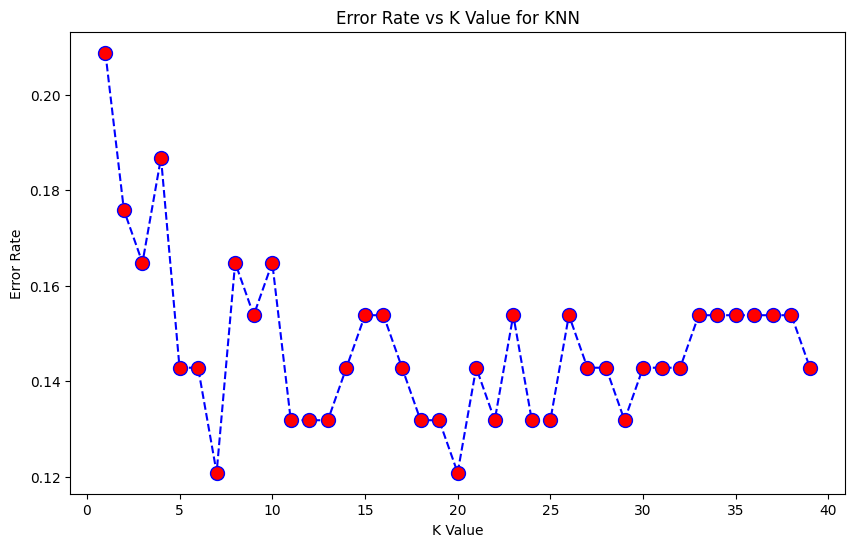

In [205]:
# Find optimal number of neighbors using error rate
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate vs K
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value for KNN')
plt.show()


In [206]:
# Train KNN with the selected optimal number of neighbors (e.g., k=12)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train_scaled, y_train)

# Predict on the test set
ypred4 = knn.predict(x_test_scaled)


In [207]:
# Confusion matrix and accuracy
knn_conf_matrix = confusion_matrix(y_test, ypred4)
knn_acc_score = accuracy_score(y_test, ypred4)

print("Confusion Matrix:\n", knn_conf_matrix)
print("Accuracy Score:", knn_acc_score * 100, "%")


Confusion Matrix:
 [[37  7]
 [ 5 42]]
Accuracy Score: 86.81318681318682 %


#### As we see KNN gives us an accuracy of around 86% which is good

### Support Vector Machine(SVM)

In [211]:
from sklearn import svm                 # Import SVM module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [212]:
# Assume X and y are already defined
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [214]:
# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize SVM model
svm_model = svm.SVC()                  # Create the SVM classifier object

# Train the SVM model on the scaled training data
svm_model.fit(x_train_scaled, y_train)  # Use integer target directly



SVC()

In [216]:
# Make predictions using the trained SVM model
ypred5 = svm_model.predict(x_test_scaled)  # Use the scaled test set

In [218]:

# Compute confusion matrix
svm_conf_matrix = confusion_matrix(y_test, ypred5)
# Compute accuracy score
svm_acc_score = accuracy_score(y_test, ypred5)

In [219]:
# Display confusion matrix
print("Confusion Matrix:\n", svm_conf_matrix)



Confusion Matrix:
 [[35  9]
 [ 5 42]]


In [220]:
# Display accuracy as percentage
print("Accuracy Score:", svm_acc_score * 100, "%")

Accuracy Score: 84.61538461538461 %


#### We get an accuracy of 84% in SVM

#### Let us see our model accuracy in Table form

In [221]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [222]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [223]:
model_acc

,Model,Accuracy
0,Logistic Regression,87.912088
3,K Nearest Neighbor,86.813187
4,SVM,84.615385
2,Random Forest,81.318681
1,Decision Tree,70.329670


#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [227]:
# Initialize SVM as base estimator
svm_base = SVC(probability=True, kernel='linear')  # probability=True required for AdaBoost

In [228]:
# Initialize AdaBoost with SVM as base estimator
adab = AdaBoostClassifier(
    estimator=svm_base,       # use 'estimator' instead of deprecated 'base_estimator'
    n_estimators=100,         # number of weak learners
    algorithm='SAMME',        # SAMME works for multi-class SVM boosting
    learning_rate=0.01,
    random_state=0
)

In [229]:

# Train AdaBoost on scaled data
adab.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.01, n_estimators=100, random_state=0)

In [230]:
# Train AdaBoost with SVM as base estimator
adab.fit(x_train_scaled, y_train)  # Use scaled features and integer target


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.01, n_estimators=100, random_state=0)

In [231]:
# Make predictions on the test set
ypred6 = adab.predict(x_test_scaled)

In [232]:

# Compute confusion matrix
adab_conf_matrix = confusion_matrix(y_test, ypred6)


In [233]:
# Compute accuracy score
adab_acc_score = accuracy_score(y_test, ypred6)

In [234]:
# Display results
print("AdaBoost Confusion Matrix:\n", adab_conf_matrix)
print("AdaBoost Accuracy:", adab_acc_score * 100, "%")

AdaBoost Confusion Matrix:
 [[33 11]
 [ 2 45]]
AdaBoost Accuracy: 85.71428571428571 %


In [235]:
# Accuracy on training data
print("Training Accuracy:", adab.score(x_train_scaled, y_train) * 100, "%")

Training Accuracy: 82.54716981132076 %


In [236]:

# Accuracy on test data
print("Test Accuracy:", adab.score(x_test_scaled, y_test) * 100, "%")

Test Accuracy: 85.71428571428571 %


#### As we see our model has performed 85% accuracy

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
model_acc

,Model,Accuracy
0,Logistic Regression,87.912088
3,K Nearest Neighbor,86.813187
4,SVM,84.615385
2,Random Forest,81.318681
1,Decision Tree,70.329670


### Logistic Regression

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score




In [257]:
# Restrict to valid solver-penalty combinations
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2', None], 'C': [100, 10, 1.0, 0.1, 0.01]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0, 0.5, 1]}
]

In [258]:
# Initialize GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')


In [259]:
# Fit grid search
grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'penalty': ['l2', None],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'l1_ratio': [0, 0.5, 1],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

#### Let us apply these para in our Model

In [260]:
# Get best parameters and retrain
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [261]:
logreg_best = LogisticRegression(**best_params, max_iter=1000)
logreg_best.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [262]:
# Predict and evaluate
y_pred_best = logreg_best.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_best)*100, "%")

Accuracy: 85.71428571428571 %


#### We got an accuracy of 85.7%

### KNN

In [277]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [278]:

# Define hyperparameter grid
n_neighbors = range(1, 21, 2)                 # Odd K values from 1 to 19
weights = ['uniform', 'distance']             # Weighting strategies
metric = ['euclidean', 'manhattan', 'minkowski']  # Distance metrics


In [279]:
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

In [280]:

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [281]:
# Initialize KNN
knn = KNeighborsClassifier()

In [282]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search.fit(x_train, encoded_y)  # Fit on training data

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [283]:

# Display best parameters found
print("Best KNN Parameters:", grid_search.best_params_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


#### Let's apply

In [284]:
# Train KNN with best parameters
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(x_train, encoded_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [285]:
# Make predictions on test set
knn_pred = best_knn.predict(x_test)


In [286]:
# Evaluate model
knn_pred_conf_matrix = confusion_matrix(encoded_ytest, knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [287]:
print("KNN Confusion Matrix:\n", knn_pred_conf_matrix)
print("KNN Accuracy:", knn_pred_acc_score * 100, "%")

KNN Confusion Matrix:
 [[26 18]
 [ 9 38]]
KNN Accuracy: 70.32967032967034 %


#### We have an Accuracy of 70.3%

### SVM

In [288]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

In [289]:
# Define the hyperparameter grid for SVM
kernel = ['poly', 'rbf', 'sigmoid']   # Types of kernel functions
C = [50, 10, 1.0, 0.1, 0.01]         # Regularization parameter
gamma = ['scale']                     # Kernel coefficient

In [290]:
grid = dict(kernel=kernel, C=C, gamma=gamma)

In [291]:
# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Let us apply these

In [292]:
# Initialize the SVM classifier
svc_model = SVC()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search.fit(x_train, encoded_y)  # Fit on training data

# Display the best parameters found
print("Best SVM Parameters:", grid_search.best_params_)

Best SVM Parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [293]:
# Train SVM with the best parameters
best_svc = SVC(**grid_search.best_params_)
best_svc.fit(x_train, encoded_y)

SVC(C=50, kernel='poly')

In [297]:
# Make predictions on test set
svm_pred = best_svc.predict(x_test)

In [298]:
# Evaluate the model
svm_pred_conf_matrix = confusion_matrix(encoded_ytest, svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [299]:
print("SVM Confusion Matrix:\n", svm_pred_conf_matrix)

SVM Confusion Matrix:
 [[32 12]
 [ 5 42]]


In [300]:
print("SVM Accuracy:", svm_pred_acc_score * 100, "%")

SVM Accuracy: 81.31868131868131 %


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [306]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [307]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0])

In [308]:
lr_conf_matrix

array([[35,  9],
       [ 2, 45]])

In [309]:
print(lr_acc_score*100,"%")

87.91208791208791 %


#### Let us build a proper confusion matrix for our model

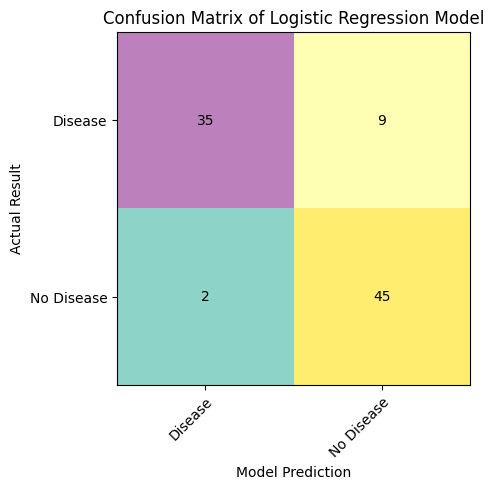

ACCURACY of our model is  87.91208791208791 %


In [310]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [311]:
import pickle

In [312]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 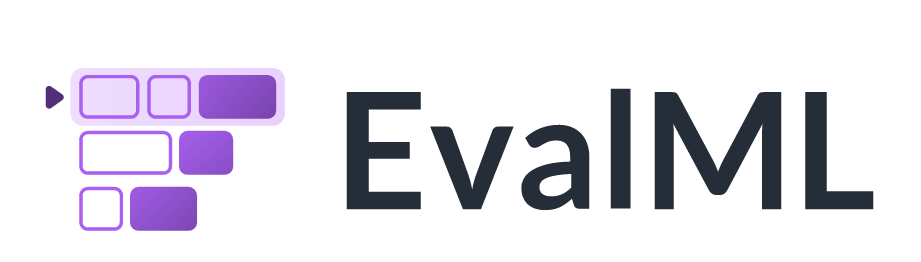
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [313]:
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Let us load our DataSet.

In [3]:
import pandas as pd
df= pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [5]:
x = df.iloc[:, :-1]  # Select all rows and all columns except the last one
# This will be our feature set (independent variables) for model training.
# 'x' contains inputs like age, sex, cholesterol, blood pressure, etc.


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

lbl = LabelEncoder()                            # Create a LabelEncoder object

y = df.iloc[:, -1]                              # Select the target/output column (1D Series)
y = lbl.fit_transform(y)                        # Encode the target labels into numeric values (0 and 1)
y                                              # Display the encoded target values



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Importing Eval ML Library**

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)


2.0.3
1.26.4


In [3]:
!pip uninstall -y pandas



Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3


In [5]:
# Install a compatible version
!pip install pandas==2.3.2




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 68.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.28.1 requires pandas<2.3.0,>=1.1, but you have pandas 2.3.2 which is incompatible.
evalml 0.84.0 requires pandas<2.1.0,>=1.5.0, but you have pandas 2.3.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [1]:
import pandas as pd
import evalml

print(pd.__version__)      # Should show 2.3.2
print(evalml.__version__)  # Should work now

2.3.2
0.84.0


Eval ML Library will do all the pre processing techniques for us and split the data for us

In [5]:
import pandas as pd

# Load dataset from CSV (update path if needed)
df = pd.read_csv('heart.csv')

# Display first 5 rows to check
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [6]:
# Features: all columns except the last
x = df.iloc[:, :-1]

# Target: last column
y = df.iloc[:, -1]

# Encode target if categorical
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(y)

# Check shapes
print("Features shape:", x.shape)
print("Target shape:", y.shape)


Features shape: (303, 13)
Target shape: (303,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (212, 13)
X_test shape: (91, 13)
y_train shape: (212,)
y_test shape: (91,)


**Running the Auto ML to select best Algorithm**

In [10]:
from evalml.automl import AutoMLSearch

# Initialize AutoML search for a binary classification problem
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')


In [11]:
# This will try multiple pipelines to find the best one
automl.search()


	Mode Baseline Binary Classification Pipeline may not perform as estimated on unseen data.


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 3.4989609718322754,
  'Total time of batch': 3.6826553344726562},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.6634457111358643,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.154461622238159,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.665614128112793,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.212399482727051,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 2.2662243843078613,
  'Total time of batch': 10.578964710235596}}

As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [12]:

# Display the performance ranking of all pipelines
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.451705,0.451705,0.048416,97.173580,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.455367,0.455367,0.060227,97.150664,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Logistic Regression Classifier w/ Label Encode...,6,0.455543,0.455543,0.059868,97.149565,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.506633,0.506633,0.097660,96.829884,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.519220,0.519220,0.084338,96.751126,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.577994,0.577994,0.059237,96.383365,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,15.981529,15.981529,0.254380,0.000000,True,"{'Label Encoder': {'positive_label': None}, 'B..."


In [13]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Label Encoder.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['age', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'caa']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [14]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [15]:
# Get the pipeline ID of the top-ranked pipeline
best_pipeline_id = automl.rankings.iloc[0]["id"]

# Display detailed information about the best pipeline, including components and parameters
automl.describe_pipeline(best_pipeline_id)



**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************


* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['age', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'caa']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['age', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'caa']


4. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:4. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.396       0.378 0.829 0.914      0.569 0.699                     0.671            0.648        141           71
1                      0.479       0.512 0.716 0.858      0.792 0.691                     0.744            0.761        141           71
2                      0.480       0.593 0.707 0.854      0.793 0.767                     0.794            0.800        142           70
mean                   0.452       0.494 0.751 0.875      0.718 0.719                     0.736            0.736          -            -
std                    0.048       0.108 0.068 0.034      0.129 0.042                     0.062            0.079          -            -
coef of var            0.107       0.219 0.090 0.039      0.180 0.058                     0.084            0.107          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.396       0.378 0.829 0.914      0.569 0.699                     0.671            0.648        141           71
1                      0.479       0.512 0.716 0.858      0.792 0.691                     0.744            0.761        141           71
2                      0.480       0.593 0.707 0.854      0.793 0.767                     0.794            0.800        142           70
mean                   0.452       0.494 0.751 0.875      0.718 0.719                     0.736            0.736          -            -
std                    0.048       0.108 0.068 0.034      0.129 0.042                     0.062            0.079          -            -
coef of var            0.107       0.219 0.090 0.039      0.180 0.058                     0.084            0.107          -    

In [16]:
# Score the best pipeline on the test data using multiple evaluation metrics
# Metrics: AUC, F1-score, Precision, Recall
best_pipeline.score(X_test, y_test, objectives=["auc", "f1", "precision", "recall"])


OrderedDict([('AUC', 0.8916827852998066),
             ('F1', 0.8155339805825242),
             ('Precision', 0.75),
             ('Recall', 0.8936170212765957)])

Now if we want to build our Model for a specific objective we can do that

In [17]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 3.5598654747009277,
  'Total time of batch': 3.6879100799560547}}

In [18]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.838593,0.838593,0.051736,33.85925,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.00000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [19]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 3.5 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 3.5 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.894 0.765      0.722        141           71
1           0.792 0.690      0.741        141           71
2           0.830 0.700      0.724        142           70
mean        0.839 0.718      0.729          -            -
std         0.052 0.041      0.010          -            -
coef of var 0.062 0.057      0.014          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.894 0.765      0.722        141           71
1           0.792 0.690      0.741        141           71
2           0.830 0.700      0.724        142           70
mean        0.839 0.718      0.729          -            -
std         0.052 0.041      0.010          -            -
coef of var 0.062 0.057      0.014          -            -


In [20]:
best_pipeline_auc = automl_auc.best_pipeline


In [21]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8660541586073501)])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [22]:
best_pipeline.save("model.pkl")

Loading our Model

In [23]:

final_model=automl.load('model.pkl')

In [24]:
final_model.predict_proba(X_test)

,0,1
221,0.869473,0.130527
8,0.219863,0.780137
89,0.285955,0.714045
154,0.122565,0.877435
201,0.912468,0.087532
...,...,...
247,0.443410,0.556590
85,0.230365,0.769635
280,0.807802,0.192198
31,0.363370,0.636630


In [25]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.2 MB/s eta 0:00:00


In [26]:
import joblib

# Assuming your model is `final_model`
joblib.dump(final_model, "heart_disease_model.pkl")


['heart_disease_model.pkl']

In [27]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load("heart_disease_model.pkl")

st.title("💓 Heart Disease Risk Prediction App")
st.write("Enter patient data to predict the risk of heart disease.")

# Input fields
age = st.number_input("Age", 1, 120, 30)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.number_input("Chest Pain Type (0-3)", 0, 3, 0)
trestbps = st.number_input("Resting Blood Pressure", 80, 250, 120)
chol = st.number_input("Serum Cholesterol", 100, 600, 200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", ["Yes", "No"])
restecg = st.number_input("Resting ECG (0-2)", 0, 2, 0)
thalach = st.number_input("Max Heart Rate Achieved", 50, 250, 150)
exang = st.selectbox("Exercise Induced Angina", ["Yes", "No"])
oldpeak = st.number_input("ST Depression", 0.0, 10.0, 1.0)
slope = st.number_input("Slope of Peak Exercise ST", 0, 2, 1)
ca = st.number_input("Number of Major Vessels (0-3)", 0, 3, 0)
thal = st.number_input("Thalassemia (1=Normal,2=Fixed defect,3=Reversible defect)", 1, 3, 2)

# Convert categorical inputs
sex = 1 if sex=="Male" else 0
fbs = 1 if fbs=="Yes" else 0
exang = 1 if exang=="Yes" else 0

if st.button("Predict Heart Disease Risk"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[0][1]

    if prediction[0] == 1:
        st.error(f"⚠️ High Risk ({prediction_proba*100:.2f}% probability)")
    else:
        st.success(f"✅ Low Risk ({prediction_proba*100:.2f}% probability)")


Writing app.py


In [36]:
!ngrok config add-authtoken 323plW16VNuGciZKfBe9byc9IOZ_3RuxNa7yPeFTgQKwqonbF






Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
%%writefile app.py
import streamlit as st

st.title("Heart Disease Risk Prediction 💓")
st.write("Welcome! This app predicts the risk of heart disease based on your data.")

age = st.number_input("Age", min_value=1, max_value=120)
sex = st.selectbox("Sex", ["Male", "Female"])
# You can add more input fields as per your model features

st.write("Your inputs:")
st.write({"Age": age, "Sex": sex})



Overwriting app.py


In [1]:
!pip install --quiet streamlit pyngrok


In [ ]:
!streamlit run app.py &
from pyngrok import ngrok

# Create a public URL for your Streamlit app
public_url = ngrok.connect(port='8501')
print("Your Streamlit app is live at:", public_url)




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.34.13.137:8501

